In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


energyData = pd.read_csv("/Users/tanneramman/Downloads/energyDataLinear2021.csv")
energy = energyData.copy()
energy = energy.drop(columns = 'Unnamed: 0')

weatherData = pd.read_csv('/Users/tanneramman/Downloads/CountyWeatherRank.csv')


countyGroup = energy.groupby(['County'], as_index = False).mean()



/Users/tanneramman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
justEnergy = countyGroup[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
solarSort = justEnergy.copy()
solarSort['summed'] = solarSort.sum(axis=1)

solarSort['Solar Energy Percentage'] = solarSort['Estimate!!Total!!Solar energy']/solarSort['summed']*100

solarSort = solarSort.sort_values(by='Solar Energy Percentage')
solarSort = solarSort.reset_index()
solarSort.head()
#solarSort.to_csv("/Users/tanneramman/Downloads/sortedBySolar.csv")


/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_39051/1751704047.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  solarSort['summed'] = solarSort.sum(axis=1)


,index,County,Estimate!!Total!!Utility gas,"Estimate!!Total!!Bottled, tank, or LP gas",Estimate!!Total!!Electricity,"Estimate!!Total!!Fuel oil, kerosene, etc.",Estimate!!Total!!Coal or coke,Estimate!!Total!!Wood,Estimate!!Total!!Solar energy,Estimate!!Total!!Other fuel,Estimate!!Total!!No fuel used,summed,Solar Energy Percentage
0,31,Kiowa,376.4,137.4,71.0,0.4,0.0,14.1,0.0,11.9,2.6,613.8,0.0
1,61,Washington,785.7,693.4,492.7,4.7,0.0,51.9,0.0,24.7,12.6,2065.7,0.0
2,58,Sedgwick,556.0,198.0,202.5,0.6,0.8,8.4,0.0,7.7,1.4,975.4,0.0
3,56,San Juan,26.8,147.8,42.0,0.0,10.3,55.4,0.0,2.0,0.0,284.3,0.0
4,50,Prowers,3841.6,372.6,548.6,17.8,0.0,60.7,0.0,25.9,43.1,4910.3,0.0


In [6]:
population = countyGroup.copy()
population = population.sort_values(by = 'Census_Population', ascending = False)
population = population.reset_index()
population.head()
#copy.to_csv("/Users/tanneramman/Downloads/sortedByPopulation.csv")

,index,County,Estimate!!Total,Estimate!!Total!!Utility gas,"Estimate!!Total!!Bottled, tank, or LP gas",Estimate!!Total!!Electricity,"Estimate!!Total!!Fuel oil, kerosene, etc.",Estimate!!Total!!Coal or coke,Estimate!!Total!!Wood,Estimate!!Total!!Solar energy,...,Longitude,tempmax,tempmin,temp,humidity,precipcover,cloudcover,solarradiation,solarenergy,uvindex
0,16,Denver,293150.5,196794.2,3581.3,85905.6,344.5,13.5,301.6,750.8,...,-104.880625,65.848077,39.699359,52.000641,46.857692,5.128077,51.629487,244.592308,14.983333,6.282051
1,20,El Paso,258014.4,183180.2,9840.8,60570.3,244.4,41.3,1569.1,280.8,...,-104.527472,64.783974,38.398077,51.207051,45.360897,5.689231,43.441667,222.887821,13.603846,5.980769
2,2,Arapahoe,239884.9,166959.4,3028.0,66495.2,229.4,75.3,555.7,496.0,...,-104.331733,65.786538,39.827564,52.123718,46.576282,5.128077,51.721795,250.159615,14.717308,6.250000
3,30,Jefferson,230099.1,171052.6,5117.5,48264.6,176.9,12.4,2198.6,765.2,...,-105.245601,65.175000,39.973077,52.104487,45.830128,5.528782,45.324359,220.968590,13.870513,5.788462
4,0,Adams,165972.4,120736.8,2502.9,40389.5,118.1,17.5,413.2,439.5,...,-104.331872,65.986538,39.743590,52.216667,46.734615,5.128077,51.708333,267.446795,15.969231,7.044872


In [7]:
solarRank = solarSort.rename_axis('Solar Rank').reset_index()
popRank = population.rename_axis('Population Rank').reset_index()

In [9]:
allRanked = pd.merge(solarRank, popRank, on = "County")
allRanked.head()

,Solar Rank,index_x,County,Estimate!!Total!!Utility gas_x,"Estimate!!Total!!Bottled, tank, or LP gas_x",Estimate!!Total!!Electricity_x,"Estimate!!Total!!Fuel oil, kerosene, etc._x",Estimate!!Total!!Coal or coke_x,Estimate!!Total!!Wood_x,Estimate!!Total!!Solar energy_x,...,Longitude,tempmax,tempmin,temp,humidity,precipcover,cloudcover,solarradiation,solarenergy,uvindex
0,0,31,Kiowa,376.4,137.4,71.0,0.4,0.0,14.1,0.0,...,-102.756210,71.191026,38.971795,54.469231,51.231410,3.365449,19.105128,207.478205,16.956410,6.910256
1,1,61,Washington,785.7,693.4,492.7,4.7,0.0,51.9,0.0,...,-103.209605,64.935897,37.967308,50.930769,52.983974,2.350577,22.298077,219.221154,16.534615,6.455128
2,2,58,Sedgwick,556.0,198.0,202.5,0.6,0.8,8.4,0.0,...,-102.355358,66.969231,38.547436,51.873718,57.542308,3.579038,19.683974,230.927564,16.906410,6.743590
3,3,56,San Juan,26.8,147.8,42.0,0.0,10.3,55.4,0.0,...,-107.670257,55.367949,35.514744,44.975641,45.785897,3.899551,33.885897,263.936538,16.121154,7.096154
4,4,50,Prowers,3841.6,372.6,548.6,17.8,0.0,60.7,0.0,...,-102.392161,71.024359,38.947436,54.423718,52.203205,3.899551,19.178205,236.626923,17.329487,7.192308


In [10]:
weatherAnd = pd.merge(weatherData, allRanked, on = "County")

In [11]:
weatherAnd.columns

Index(['County', 'AVG Potential Energy', 'AVG Temp', 'AVG Cloud Cover',
       'Rank Fun', 'Rank', 'Unnamed: 6', 'Solar Rank', 'index_x',
       'Estimate!!Total!!Utility gas_x',
       'Estimate!!Total!!Bottled, tank, or LP gas_x',
       'Estimate!!Total!!Electricity_x',
       'Estimate!!Total!!Fuel oil, kerosene, etc._x',
       'Estimate!!Total!!Coal or coke_x', 'Estimate!!Total!!Wood_x',
       'Estimate!!Total!!Solar energy_x', 'Estimate!!Total!!Other fuel_x',
       'Estimate!!Total!!No fuel used_x', 'summed', 'Solar Energy Percentage',
       'Population Rank', 'index_y', 'Estimate!!Total',
       'Estimate!!Total!!Utility gas_y',
       'Estimate!!Total!!Bottled, tank, or LP gas_y',
       'Estimate!!Total!!Electricity_y',
       'Estimate!!Total!!Fuel oil, kerosene, etc._y',
       'Estimate!!Total!!Coal or coke_y', 'Estimate!!Total!!Wood_y',
       'Estimate!!Total!!Solar energy_y', 'Estimate!!Total!!Other fuel_y',
       'Estimate!!Total!!No fuel used_y', 'State', 'County 

In [12]:
finalNumbers = weatherAnd.copy()
finalNumbers['Total Rank'] = finalNumbers['Solar Rank'] + finalNumbers['Population Rank'] + finalNumbers['Rank']
cutDown = finalNumbers[['County', 'Total Rank']]
inOrder = cutDown.sort_values(by='Total Rank')
inOrder.head()


,County,Total Rank
8,Pueblo,36
5,Elbert,50
13,Fremont,54
18,Otero,60
21,Prowers,61


In [13]:
topFive = inOrder.head(5)

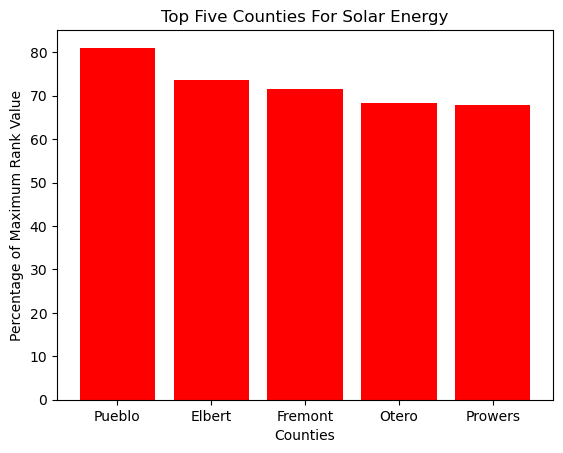

In [25]:
x = topFive['County']
y = 100 - ((topFive['Total Rank']/190)*100)
plt.bar(x, y, color='r')
plt.title('Top Five Counties For Solar Energy')
plt.xlabel('Counties')
plt.ylabel(f'Percentage of Maximum Rank Value')
plt.savefig("/Users/tanneramman/Downloads/TopFiveLocations.png")
plt.show()